
# Part I - (Ford GoBike)
## Adham Kassem

## Introduction

This Data set contains the info of ford go bike trips during february 2019

## Preliminary Wrangling

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from geopy.distance import geodesic 
import holidays
import datetime


In [2]:
df = pd.read_csv("data.csv")
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Checking for empty values

In [3]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

since we don't have many missing values so i'll drop them from the dataset


In [4]:
df.dropna(inplace=True)

Checking for dublicates

In [5]:
df.duplicated().sum()

np.int64(0)

the data doesn't have any dublicates

importing holidays to the data

In [6]:
us_holidays = holidays.US()

# Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['is_holiday'] = df['start_time'].dt.date.apply(lambda x: x in us_holidays)
df['is_weekend'] = (pd.to_datetime(df['start_time']).dt.weekday>=5).astype(int)

df.head(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,is_holiday,is_weekend
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,False,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,False,0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,False,0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,False,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,805,2019-02-28 22:58:55.620,2019-02-28 23:12:21.442,77.0,11th St at Natoma St,37.773507,-122.416040,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,6124,Subscriber,1981.0,Male,No,False,0
101,124,2019-02-28 23:10:05.060,2019-02-28 23:12:09.918,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,132.0,24th St at Chattanooga St,37.751819,-122.426614,4714,Subscriber,1981.0,Male,No,False,0
102,511,2019-02-28 23:02:09.727,2019-02-28 23:10:41.308,129.0,Harrison St at 20th St,37.758862,-122.412544,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,4972,Subscriber,1991.0,Male,No,False,0
103,417,2019-02-28 23:02:55.623,2019-02-28 23:09:52.793,310.0,San Fernando St at 4th St,37.335885,-121.885660,305.0,Ryland Park,37.342725,-121.895617,1701,Subscriber,1995.0,Male,Yes,False,0


converting the duration from seconds to minutes

In [7]:
df["duration"]=df["duration_sec"].divide(60)
df.drop(columns=["duration_sec"],inplace=True)


Calulating the distance between the starting station to the ending station

In [8]:
def distance(start_coords, end_coords):
    return geodesic(start_coords, end_coords).kilometers

df['distance km'] = df.apply(lambda y: distance((y['start_station_latitude'], y['start_station_longitude']), (y['end_station_latitude'], y['end_station_longitude'])), axis=1)

Droping the inaccurate gender values

In [9]:
df = df[df["member_gender"] != "Other"]

dropping unneccary coulmns

In [10]:
df = df.drop(columns=["start_station_id", "start_station_latitude", "end_station_latitude" ,"start_station_longitude","end_station_id","end_station_longitude" , "bike_id" , "start_station_id" , "end_station_id" , "bike_share_for_all_trip" ])

### What is the structure of your dataset?

> There are 171305 Trips in this Data sets with 11 features

### What is/are the main feature(s) of interest in your dataset?

> time and it's impact on trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The member birth year is something that i think will help me demonstrate the gen is using bikes most

## Univariate Exploration


What is The most popular starting Station ?

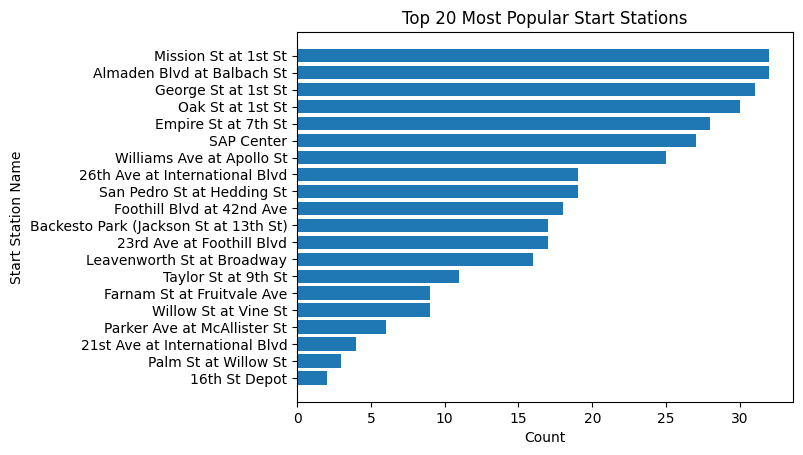

In [11]:
x = df["start_station_name"].value_counts(ascending=True).head(20)
y = x.values
plt.barh(x.index, y)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 20 Most Popular Start Stations')
plt.show()

As we see the most popular one is Mission St at 1st St with nearly equal Almaden Blvd at Balbach St

What it the most Popular ending station ?

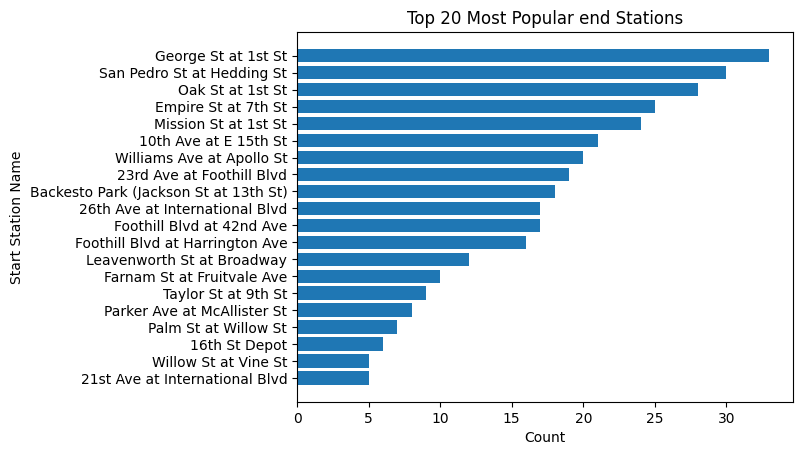

In [12]:
x = df["end_station_name"].value_counts(ascending=True).head(20)
y = x.values
plt.barh(x.index, y)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 20 Most Popular end Stations')
plt.show()

As we see the most popular ending station i George St at 1st St

What is the distribution of duration ?

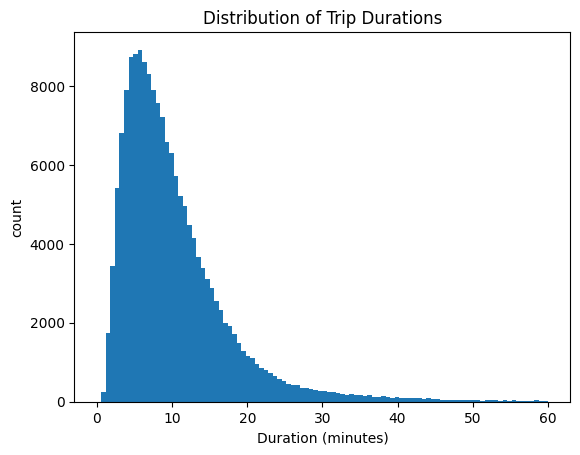

In [13]:
plt.hist(df['duration'], bins=100, range=(0, 60))
plt.xlabel('Duration (minutes)')
plt.ylabel('count')
plt.title('Distribution of Trip Durations')
plt.show()

most Trips last about 10 minutes 

## Bivariate Exploration



Type of Users that use bikes more ?

Text(0.5, 1.0, 'Trip Durations by User Type')

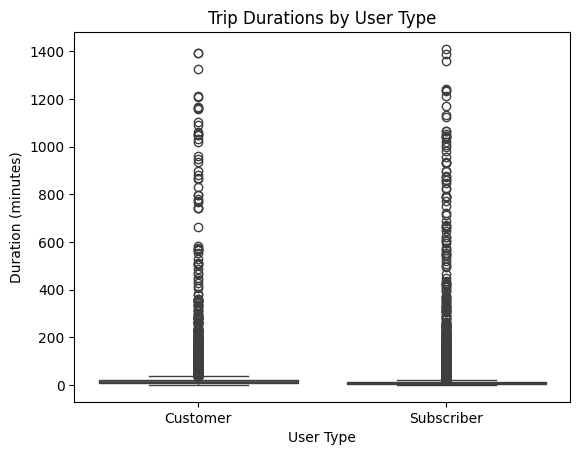

In [26]:
sns.boxplot(data= df , x="user_type" , y="duration")
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('Trip Durations by User Type')


as we see the F

Does the duration have impact on distance ?

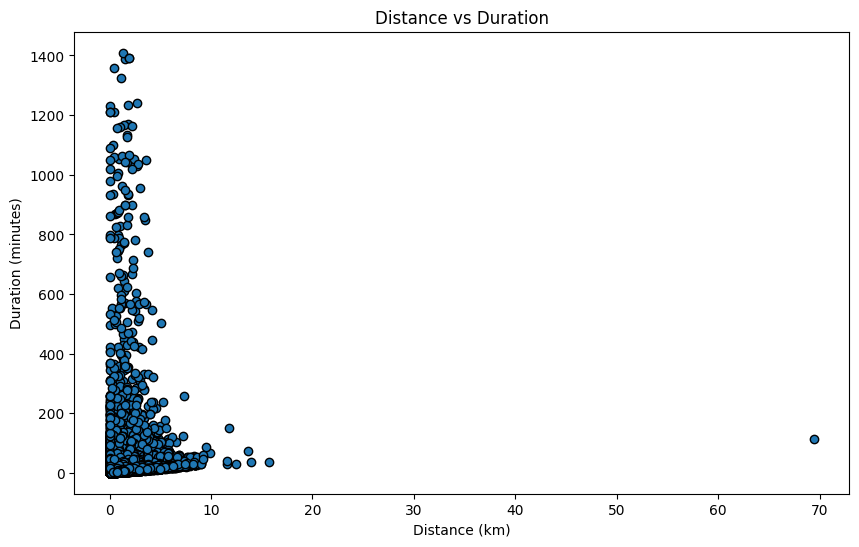

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(x = df['distance km'], y = df['duration'], edgecolors="black")
plt.xlabel('Distance (km)')
plt.ylabel('Duration (minutes)')
plt.title('Distance vs Duration')
plt.show()

Yes it does

age vs holidays

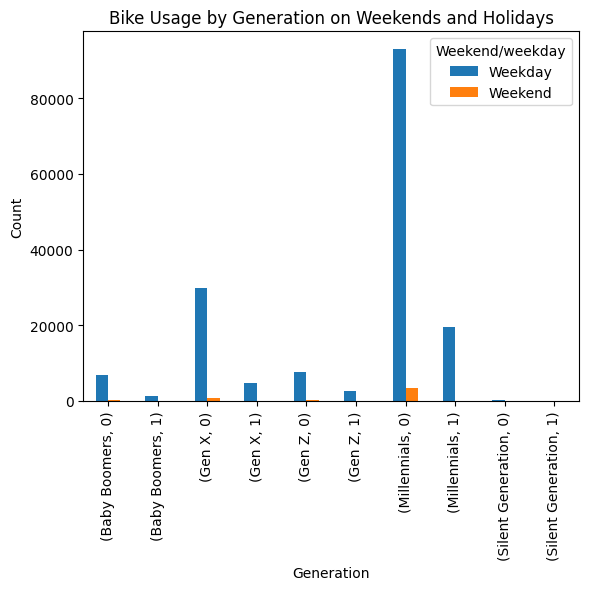

In [ ]:
# Define generations based on birth year
def get_generation(year):
    if year >= 1997:
        return 'Gen Z'
    elif year >= 1981:
        return 'Millennials'
    elif year >= 1965:
        return 'Gen X'
    elif year >= 1946:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

df['generation'] = df['member_birth_year'].apply(get_generation)

# Group by generation, is_weekend, and is_holiday
grouped = df.groupby(['generation', 'is_weekend', 'is_holiday']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Bike Usage by Generation on Weekends and Holidays')
plt.legend(title='Weekend/weekday', labels=['Weekday', 'Weekend', 'Holiday'])
plt.show()

Millennials are using the bikes the most

Rush hour at Days by GEN

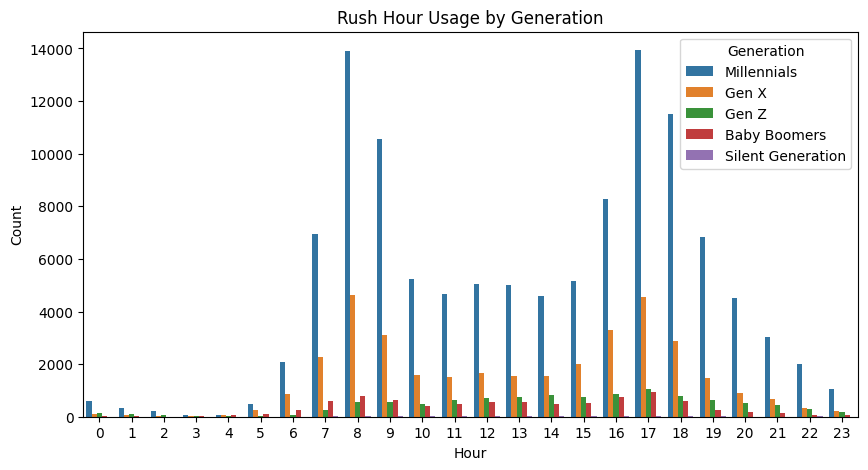

In [ ]:
df["day"]=df["start_time"].dt.day_name()
df["hour"]=df["start_time"].dt.hour
df["month"]=df["start_time"].dt.month
df["day_number"]=df["start_time"].dt.day
df["year"]=df["start_time"].dt.year
plt.figure(figsize=(10,5))
plt.title("Rush Hour Usage by Generation")
sns.countplot(data=df, x="hour", hue="generation", order=range(0,24))
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title='Generation')
plt.show()


from this graph we can see millennials behavior at using bikes as they use it to go to work and to get home

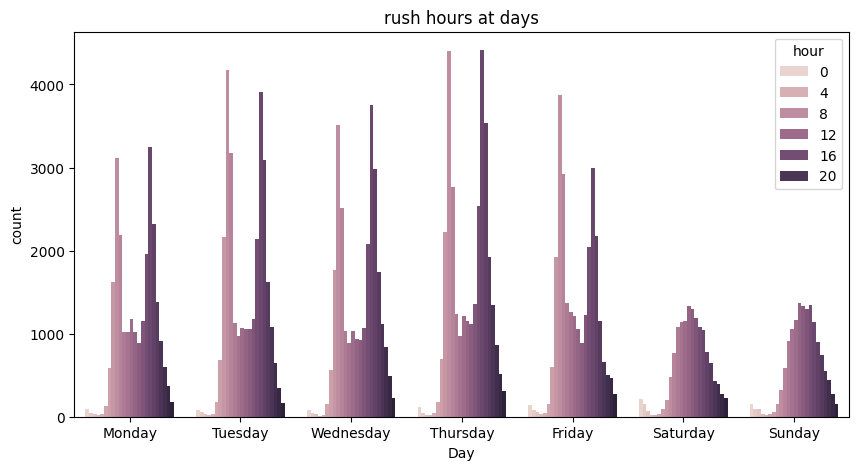

In [ ]:
plt.figure(figsize=(10,5))
plt.title("rush hours at days")
sns.countplot(data=df, x="day", hue="hour", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Day")
plt.ylabel("count")
plt.legend(title="hour")
plt.show()

thursday has the most bike usage

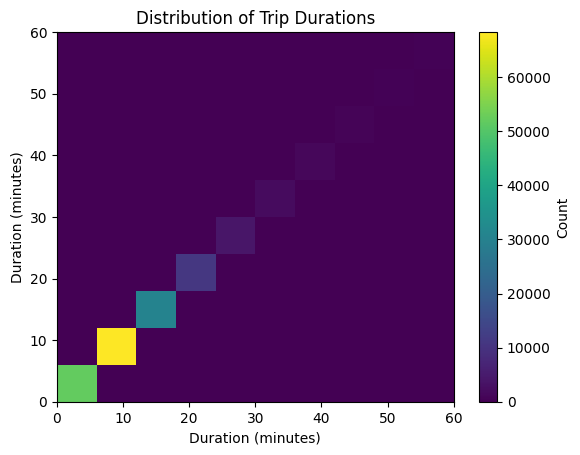

In [ ]:
plt.hist2d(x = df['duration'], y = df['duration'], bins=10, range=[[0, 60], [0, 60]])
plt.xlabel('Duration (minutes)')
plt.ylabel('Duration (minutes)')
plt.title('Distribution of Trip Durations')
plt.colorbar(label='Count')
plt.show()

the most popular duration is 10 minutes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers tend to more usage duration than customers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> millineals is using bikes for going to work and returning from work

## Multivariate Exploration


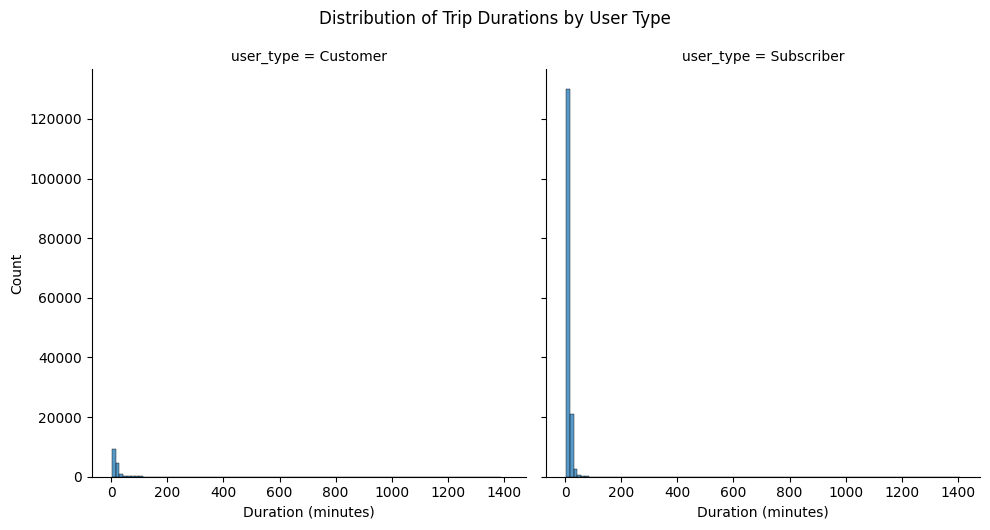

In [ ]:
plot = sns.FacetGrid(data = df, col = 'user_type', col_wrap = 2 , height= 5)
plot.map(sns.histplot, 'duration', bins = 100)
plot.set_axis_labels('Duration (minutes)', 'Count')
plot.fig.suptitle('Distribution of Trip Durations by User Type', y=1.05)
plt.show()

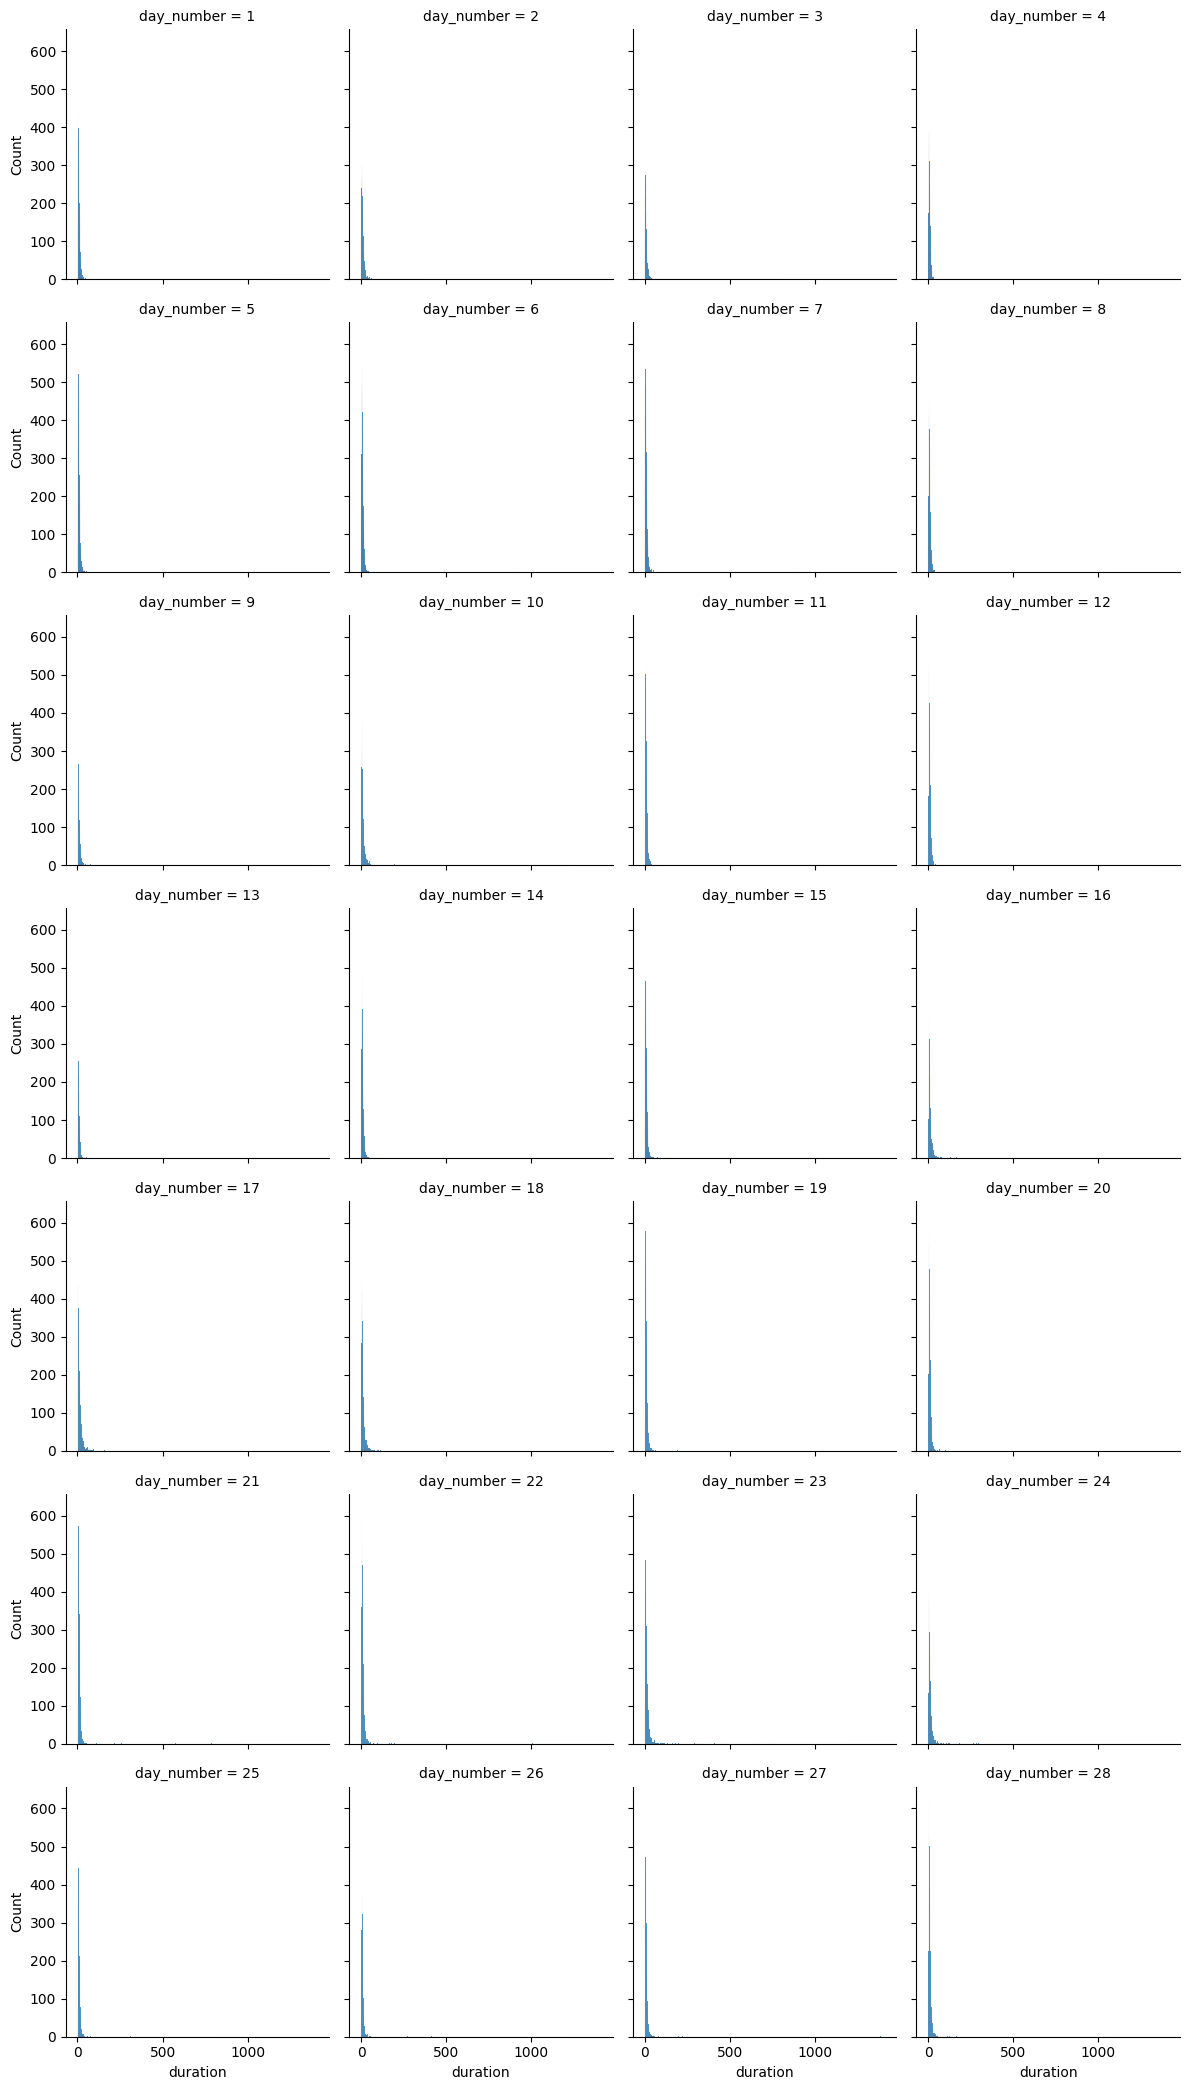

In [ ]:
plot= sns.FacetGrid(data=df,col="day_number",col_wrap=4)
plot.map(sns.histplot,"duration")
plt.show()

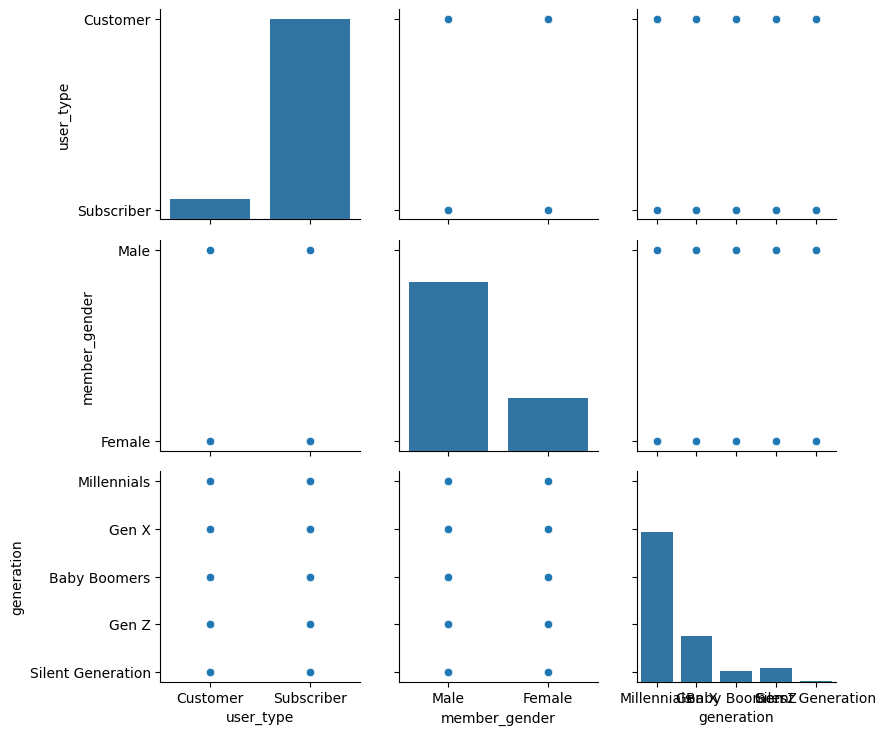

In [ ]:
stats = ["user_type", "member_gender", "generation"]
plot = sns.PairGrid(df, vars=stats)
plot.map_offdiag(sns.scatterplot)
plot.map_diag(sns.countplot)
plot.add_legend()
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> males do use bikes more and most of subscribers are males

### Were there any interesting or surprising interactions between features?

>the result of my multivariate exploration was in line with my bivariate exploration

## Conclusions


Although this data set doesn't have enough data for deeper analysis but i found out that

1. males are using bikes more than females
2. subscribers use bikes more than customers
3. subscribers uses bikes for longer trips
4. millenials do the most bike usage
5. millenials go to work and return from it by bikes
6. thursday is the busiest day for bikes
7. most of trips duration is around 10 minutes
8. usually the distance for trips are less than 10 kilometers
9. the most popular starting station is Mission St at 1st St with nearly equal Almaden Blvd at Balbach St
10. the most popular ending station i George St at 1st St


In [31]:
df

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,is_holiday,is_weekend,duration,distance km
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,False,0,869.750000,0.543983
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,False,0,1030.900000,2.705390
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,False,0,26.416667,2.412017
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,False,0,29.883333,3.328256
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,1983.0,Female,False,0,19.116667,2.029323
...,...,...,...,...,...,...,...,...,...,...,...
183407,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,Beale St at Harrison St,Union Square (Powell St at Post St),Subscriber,1996.0,Male,False,0,8.000000,1.468251
183408,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,Subscriber,1984.0,Male,False,0,5.216667,1.401670
183409,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,The Alameda at Bush St,Morrison Ave at Julian St,Subscriber,1990.0,Male,False,0,2.350000,0.379546
183410,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,Subscriber,1988.0,Male,False,0,2.316667,0.746150
